# OBJETIVOS:

-El objetivo de este proyecto era ver y analizar los datos de una bomba
de desagüe. Teníamos que resolver el problema presentado que era que una
parte defendía que la bomba se activaba más veces últimamente
(tras las supuestas mejoras) y la otra que con las mejoras se debería
de activar menos.

Realizamos al final un trabajo de filtrado y visualización de datos 
para confirmar cualquier teoría.

# Estructura:

-En primer lugar, contamos con dos datasets uno que nos habla
de si la bomba y sus componentes están acoplados al sistema y otro
que nos dice si la bomba está trabajando. Una vez visto los datos
los limpiamos y notificamos cualquier fallo en la toma de datos para que 
no se comprometan nuestros resultados.

-Una vez hecho esto, debemos ajustar los dos datasets y quedarnos con los
datos de activación de la bomba sólo cuando el otro dataset nos diga
que la bomba está conectada. Realmente, solo en esta situación los datos 
nos están resolviendo nuestra pregunta.

-Para acabar, realizamos la visualización de los datos y sacamos las
conclusiones pertinentes.

In [ ]:
## IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import matplotlib.dates as mdates
import datetime

pd.set_option("max_columns", None) #Showing only two columns
pd.set_option("max_rows", None)

In [ ]:
data=pd.read_csv("Estado.csv",sep=";",header=None)
df=pd.DataFrame()
df["tiempo"]=data[0]
df["estado"]=data[1]
df["acoplado"]=data[12]
df['tiempo'] = df['tiempo'].str.replace(r' su', '')
df['tiempo'] = df['tiempo'].str.replace(r' iv', '')
df.head(5)

df["tiempo"]=pd.to_datetime(df["tiempo"],dayfirst=True )
df=df[df["acoplado"]=="ACOPLADO"]
df=df.reset_index(drop=False)
df_=df.copy()
#CORREGIMOS FALLOS EN LA TOMA DE DATOS PARA QUE NO SE COMPROMETAN NUESTROS RESULTADOS.
lista=[]
for i in range(len(df)):
  if ((df.iloc[i]["index"]!= 3) and (df.iloc[i]["index"]!=3744)):  
    if ((df.iloc[i]["index"]+1!=df.iloc[i+1]["index"]) and (df.iloc[i]["index"]-1!=df.iloc[i-1]["index"])):
      lista.append(df.iloc[i]["index"])
      if df.iloc[i]["estado"]==0:
        nueva_fila={"index":df.iloc[i]["index"]+0.5, "tiempo":df.iloc[i]["tiempo"], "estado":32, "acoplado":"ACOPLADO"}
        df_=df_.append(nueva_fila,ignore_index=True)
      else:
        nueva_fila={"index":df.iloc[i]["index"]-0.3, "tiempo":df.iloc[i]["tiempo"], "estado":0, "acoplado":"ACOPLADO"}
        df_=df_.append(nueva_fila,ignore_index=True)    

df_=df_.sort_values("index")
df_.reset_index(drop=True, inplace=True)

df_marcha=df_[df_["tiempo"]>"2022-03-31 23:59:59.999"]

In [ ]:
df_marcha.head(10)

,index,tiempo,estado,acoplado
344,1956.0,2022-04-01 09:53:17.410,0,ACOPLADO
345,1957.0,2022-04-01 12:43:57.010,32,ACOPLADO
346,1958.0,2022-04-01 12:43:57.010,0,ACOPLADO
347,1959.0,2022-04-01 12:44:07.520,32,ACOPLADO
348,1996.0,2022-04-04 18:35:51.790,0,ACOPLADO
349,1997.0,2022-04-04 18:44:23.840,32,ACOPLADO
350,1998.0,2022-04-04 18:44:23.850,0,ACOPLADO
351,1999.0,2022-04-04 18:44:33.240,32,ACOPLADO
352,2020.0,2022-04-05 09:38:13.500,0,ACOPLADO
353,2021.0,2022-04-05 09:46:02.950,32,ACOPLADO


In [ ]:
data2=pd.read_csv("Bomba_achique.csv",sep=";",header=None)
df2=pd.DataFrame()
df2["tiempo"]=data2[0]
df2["estado"]=data2[1]

df2['tiempo'] = df2['tiempo'].str.replace(r' su', '')
df2['tiempo'] = df2['tiempo'].str.replace(r' iv', '')


df2["tiempo"]=pd.to_datetime(df2["tiempo"],dayfirst=True )

df2=df2.reset_index(drop=False)
df2_=df2.copy()
#CORREGIMOS FALLOS EN LA TOMA DE DATOS PARA QUE NO SE COMPROMETAN NUESTROS RESULTADOS.
lista=[]
for i in range(len(df2)):
  if ((df2.iloc[i]["index"]!= 0) and (df2.iloc[i]["index"]!=3253)):  
    if ((df2.iloc[i]["index"]+1!=df2.iloc[i+1]["index"]) and (df2.iloc[i]["index"]-1!=df2.iloc[i-1]["index"])):
      lista.append(df2.iloc[i]["index"])
      if df2.iloc[i]["estado"]==0:
        nueva_fila={"index":df2.iloc[i]["index"]+0.5, "tiempo":df2.iloc[i]["tiempo"], "estado":32, "acoplado":"ACOPLADO"}
        df_2=df2_.append(nueva_fila,ignore_index=True)
      else:
        nueva_fila={"index":df2.iloc[i]["index"]-0.3, "tiempo":df2.iloc[i]["tiempo"], "estado":0, "acoplado":"ACOPLADO"}
        df_2=df2_.append(nueva_fila,ignore_index=True)    

df2_=df2_.sort_values("index")
df2_.reset_index(drop=True, inplace=True)

df2_marcha=df2_[df2_["tiempo"]>"2022-03-31 23:59:59.999"]

In [ ]:
df2_marcha.head()

,index,tiempo,estado
120,120,2022-04-01 00:56:43.400,0
121,121,2022-04-01 00:58:42.280,32
122,122,2022-04-01 02:56:08.010,0
123,123,2022-04-01 02:58:10.550,32
124,124,2022-04-01 04:52:44.890,0


In [ ]:
df_marcha.head()

,index,tiempo,estado,acoplado
344,1956.0,2022-04-01 09:53:17.410,0,ACOPLADO
345,1957.0,2022-04-01 12:43:57.010,32,ACOPLADO
346,1958.0,2022-04-01 12:43:57.010,0,ACOPLADO
347,1959.0,2022-04-01 12:44:07.520,32,ACOPLADO
348,1996.0,2022-04-04 18:35:51.790,0,ACOPLADO


In [ ]:
trabajo=pd.DataFrame()

In [ ]:
for i in range(len(df_marcha)):
  if i % 2 == 0:
    tiempo_a=df_marcha.iloc[i]["tiempo"]
    tiempo_b=df_marcha.iloc[i+1]["tiempo"]
    
    for j in range(len(df2_marcha)):
      tiempo_c=df2_marcha.iloc[j]["tiempo"]
      if ((tiempo_c>tiempo_a) and (tiempo_c<tiempo_b)):
        nueva_fila={ "tiempo":tiempo_c, "estado":df2_marcha.iloc[j]["estado"], "acoplamiento":i}
        trabajo=trabajo.append(nueva_fila,ignore_index=True)


In [ ]:
trabajo.head(10)

,tiempo,estado,acoplamiento
0,2022-04-01 11:03:47.010,0.0,0.0
1,2022-04-01 11:05:46.450,32.0,0.0
2,2022-04-19 12:41:47.830,0.0,28.0
3,2022-04-19 12:43:45.440,32.0,28.0
4,2022-04-19 17:11:54.110,0.0,36.0
5,2022-04-19 17:13:53.660,32.0,36.0
6,2022-04-29 21:51:32.720,0.0,44.0
7,2022-04-29 21:53:29.240,32.0,44.0
8,2022-05-05 20:44:52.210,0.0,48.0
9,2022-05-05 20:46:54.110,32.0,48.0


In [ ]:
lista=trabajo["acoplamiento"].unique().tolist()

In [ ]:
cuentas = pd.DataFrame(trabajo["acoplamiento"].value_counts())
cuentas.index.name = "acoplamiento"
cuentas.columns = ['count']
cuentas.head()

,count
acoplamiento,
54.0,62
70.0,20
160.0,12
232.0,12
278.0,10


In [ ]:
filtro=pd.DataFrame()

In [ ]:
for i in range(len(trabajo)):
  for j in range(len(cuentas)):
    if ((trabajo.iloc[i]["acoplamiento"]==cuentas.index[j]) and (cuentas.iloc[j]["count"]>2)):
      nueva_fila={ "tiempo":trabajo.iloc[i]["tiempo"], "estado":trabajo.iloc[i]["estado"], "acoplamiento":trabajo.iloc[i]["acoplamiento"]}
      filtro=filtro.append(nueva_fila,ignore_index=True)

In [ ]:
filtro.head()

,tiempo,estado,acoplamiento
0,2022-05-06 07:56:17.490,0.0,50.0
1,2022-05-06 07:58:20.340,32.0,50.0
2,2022-05-06 09:41:04.620,0.0,50.0
3,2022-05-06 09:43:09.420,32.0,50.0
4,2022-05-06 20:41:05.030,0.0,52.0


In [ ]:
filtro["diff"]=filtro["tiempo"].diff()
filtro['hour_diff'] = (filtro["tiempo"].diff()) / pd.Timedelta(hours=1)

In [ ]:
filtro.head()

,tiempo,estado,acoplamiento,diff,hour_diff
0,2022-05-06 07:56:17.490,0.0,50.0,NaT,NaN
1,2022-05-06 07:58:20.340,32.0,50.0,0 days 00:02:02.850000,0.034125
2,2022-05-06 09:41:04.620,0.0,50.0,0 days 01:42:44.280000,1.712300
3,2022-05-06 09:43:09.420,32.0,50.0,0 days 00:02:04.800000,0.034667
4,2022-05-06 20:41:05.030,0.0,52.0,0 days 10:57:55.610000,10.965447


In [ ]:
final=pd.DataFrame()
for i in range(len(filtro)):
  if ((filtro.iloc[i]["estado"]==0.0) and (filtro.iloc[i-2]["estado"]==0.0) and (i!=0) and(filtro.iloc[i-2]["acoplamiento"]==filtro.iloc[i]["acoplamiento"])):
    nueva_fila={"tiempo":filtro.iloc[i]["tiempo"],"estado":filtro.iloc[i]["estado"],"acoplamiento":filtro.iloc[i]["acoplamiento"], "hour_diff":filtro.iloc[i]["hour_diff"]}
    final=final.append(nueva_fila,ignore_index=True)


In [ ]:
final2=final.copy()
final.reset_index(drop=True, inplace=True)

final=final.set_index("tiempo")
final.tail()

,estado,acoplamiento,hour_diff
tiempo,,,
2022-09-13 09:19:50.480,0.0,354.0,8.171247
2022-09-16 06:58:16.540,0.0,364.0,5.609156
2022-09-17 08:13:22.790,0.0,366.0,8.227872
2022-09-18 09:26:07.530,0.0,368.0,9.150408
2022-09-19 12:52:57.180,0.0,370.0,9.604836


In [ ]:
filtro.tail()

,tiempo,estado,acoplamiento,diff,hour_diff
495,2022-09-18 09:28:15.330,32.0,368.0,0 days 00:02:07.800000,0.035500
496,2022-09-19 03:14:30.210,0.0,370.0,0 days 17:46:14.880000,17.770800
497,2022-09-19 03:16:39.770,32.0,370.0,0 days 00:02:09.560000,0.035989
498,2022-09-19 12:52:57.180,0.0,370.0,0 days 09:36:17.410000,9.604836
499,2022-09-19 12:55:08.630,32.0,370.0,0 days 00:02:11.450000,0.036514


# ACTIVACIONES: ¿Cada cuánto se pone en marcha la bomba?

Buscamos encontrar la diferencia de tiempo entre paro y marcha

La diferencia de horas entre activamientos ha ido incrementando desde desde abril-mayo. De hecho el incremento se ha producido de forma exponencial.

Adjuntamos dos gráficas, una en la que tenemos el numero de datos de tiempo para que se vea de forma más natural.
En la otra gráfica usamos de eje x el tiempo, lo cual nos deja una desequilibrio visual, ya que no podemos tener la misma cantidad de datos según el mes .

No obstante, dibujando ambas gráfica un crecimiento exponencial en el tiempo entre activaciones.

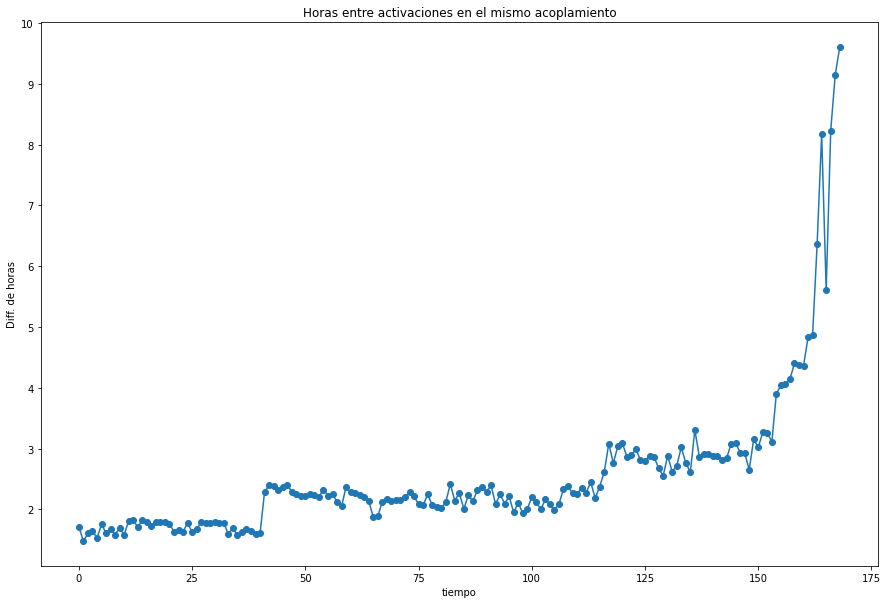

In [ ]:
plt.figure(figsize=(15,10))

final2.hour_diff.plot(title="Horas entre activaciones en el mismo acoplamiento",
                               xlabel="tiempo", ylabel="Diff. de horas",marker="o")

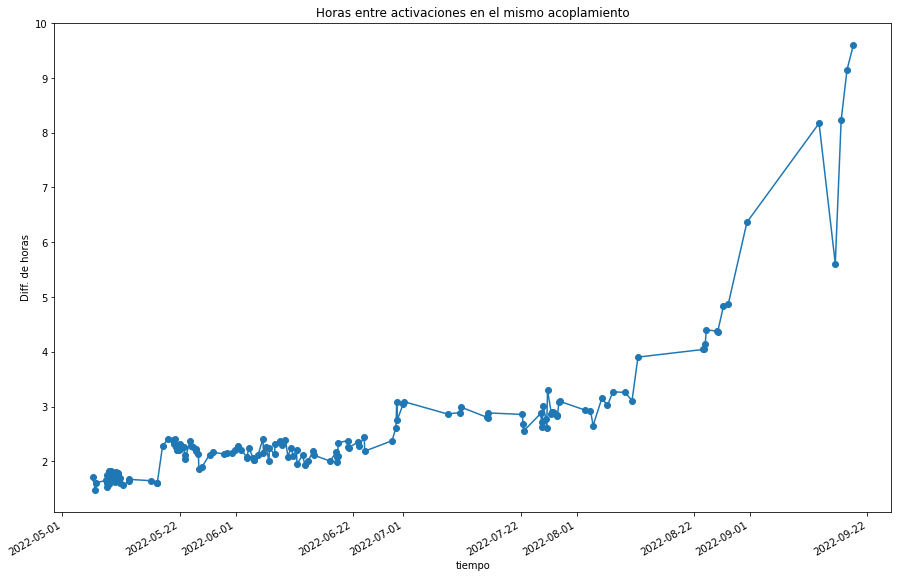

In [ ]:

plt.figure(figsize=(15,10))

final.hour_diff.plot(title="Horas entre activaciones en el mismo acoplamiento",
                               xlabel="tiempo", ylabel="Diff. de horas",marker="o")